# 1- Loading libreries and data

In [1]:
# Computation and vis
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import lasio
import missingno as msno


# Sys
import glob
import itertools
import os

# Data treatment
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import LabelEncoder

# Predictive models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

# Model tuning
from sklearn.model_selection import train_test_split, GridSearchCV

# Visualization libreries
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
# For Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

# Statistics
from scipy import stats

import warnings

np.random.seed(0)
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import  normalize
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, BayesianRidge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor



# Styling
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv(r'C:\Users\DELL\Desktop\NDU Project\Model inputs.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Depth (m)           59 non-null     float64
 1   Resistivty (ohm m)  59 non-null     int64  
 2   Gamma (API)         59 non-null     int64  
 3   Density (g/cc)      59 non-null     float64
 4   Sonic (us/ft)       59 non-null     float64
 5   Velocity (km/s)     59 non-null     float64
 6   Plagioclase         59 non-null     float64
 7   K-feldspar          59 non-null     float64
 8   Quartz              59 non-null     float64
dtypes: float64(7), int64(2)
memory usage: 4.3 KB


In [4]:
data.head()

,Depth (m),Resistivty (ohm m),Gamma (API),Density (g/cc),Sonic (us/ft),Velocity (km/s),Plagioclase,K-feldspar,Quartz
0,243.8,50,160,2.65,55.0,5.5,37.8,43.3,18.2
1,274.3,90,220,2.65,55.0,5.5,30.8,40.6,28.4
2,304.8,200,180,2.67,55.0,5.5,37.1,34.4,23.6
3,335.3,25,170,2.65,60.0,5.1,39.5,35.9,23.6
4,365.8,20,160,2.60,60.0,5.1,36.3,38.5,25.1


In [5]:
data.describe()

,Depth (m),Resistivty (ohm m),Gamma (API),Density (g/cc),Sonic (us/ft),Velocity (km/s),Plagioclase,K-feldspar,Quartz
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,1129.825424,236.949153,92.288136,2.737288,53.101695,5.761017,41.769492,33.600000,16.338983
std,533.689529,124.457502,37.855465,0.095337,2.149137,0.234901,8.409175,8.669427,10.587110
min,243.800000,20.000000,45.000000,2.600000,50.000000,5.100000,19.300000,9.000000,1.000000
25%,685.800000,150.000000,67.500000,2.670000,52.000000,5.600000,36.000000,31.000000,4.500000
50%,1097.300000,250.000000,80.000000,2.700000,53.000000,5.800000,39.000000,36.400000,19.000000
75%,1569.750000,300.000000,95.000000,2.775000,54.000000,5.900000,48.500000,39.000000,24.650000
max,2087.900000,500.000000,220.000000,3.000000,60.000000,6.100000,69.000000,48.000000,35.000000


# 2- Exploratory data analysis 

## a- Data coverage

<AxesSubplot:>

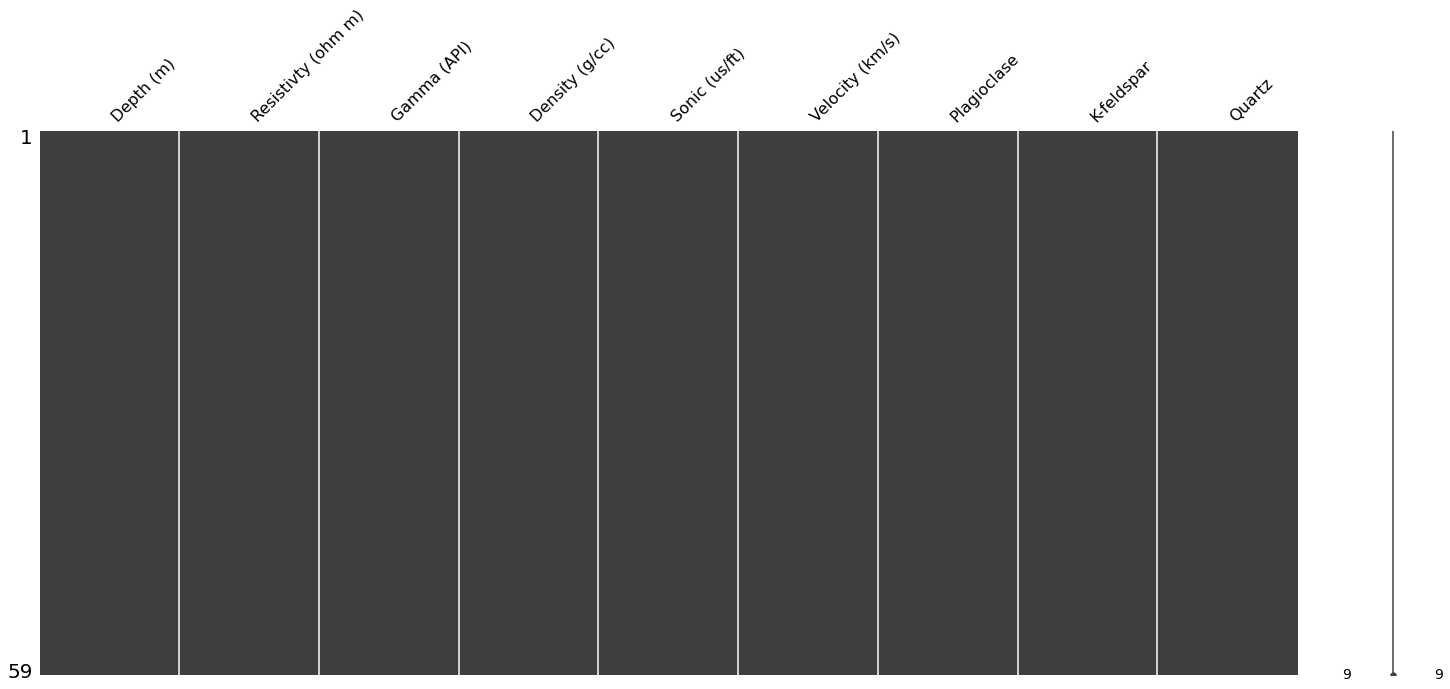

In [6]:
msno.matrix(data)

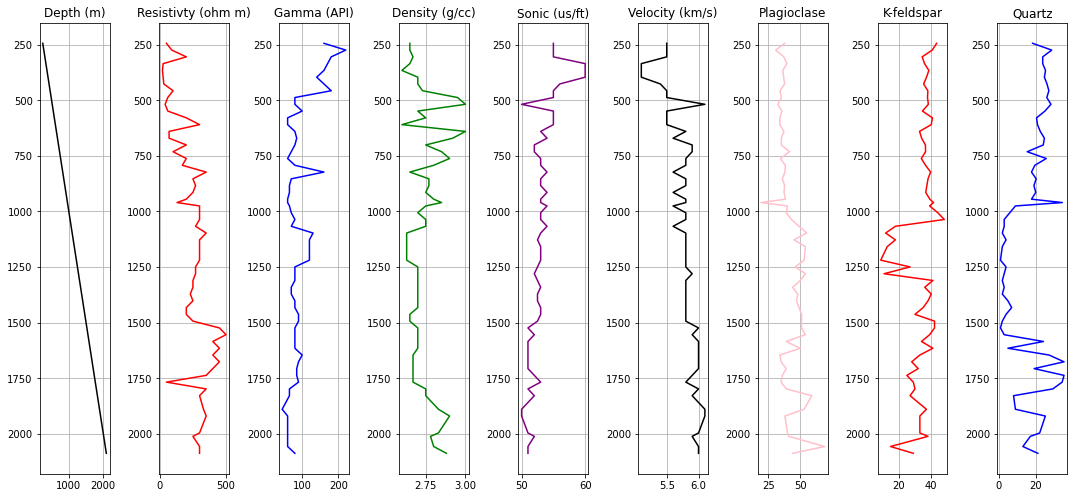

In [7]:
# define what data we wanna plot are we going to us
logs =['Depth (m)', 'Resistivty (ohm m)', 'Gamma (API)', 'Density (g/cc)',
       'Sonic (us/ft)', 'Velocity (km/s)', 'Plagioclase', 'K-feldspar',
       'Quartz']

# create the subplots; ncols equals the number of logs
fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(15,7))

# looping each log to display in the subplots
colors = ['black', 'red', 'blue', 'green', 'purple', 'black', 'pink', 'red', 'blue']

for i in range(len(logs)):
    ax[i].plot(data[logs[i]], data["Depth (m)"], color=colors[i])

    ax[i].set_title(logs[i])
    ax[i].grid(True)
    ax[i].invert_yaxis()

plt.tight_layout(1)
plt.show()

## b- Data correlation

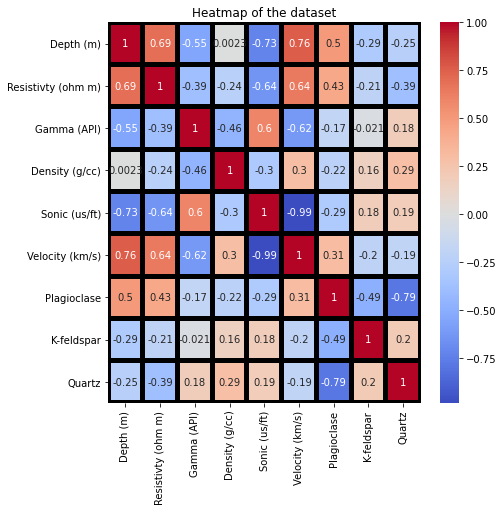

In [9]:
fig=plt.figure(figsize=(7,7))
ax = plt.axes()
sns.heatmap(data.corr(), ax = ax, cmap='coolwarm', annot=True, linewidths=4, linecolor='black')
ax.set_title('Heatmap of the dataset')
plt.show()

## c- Data distribution

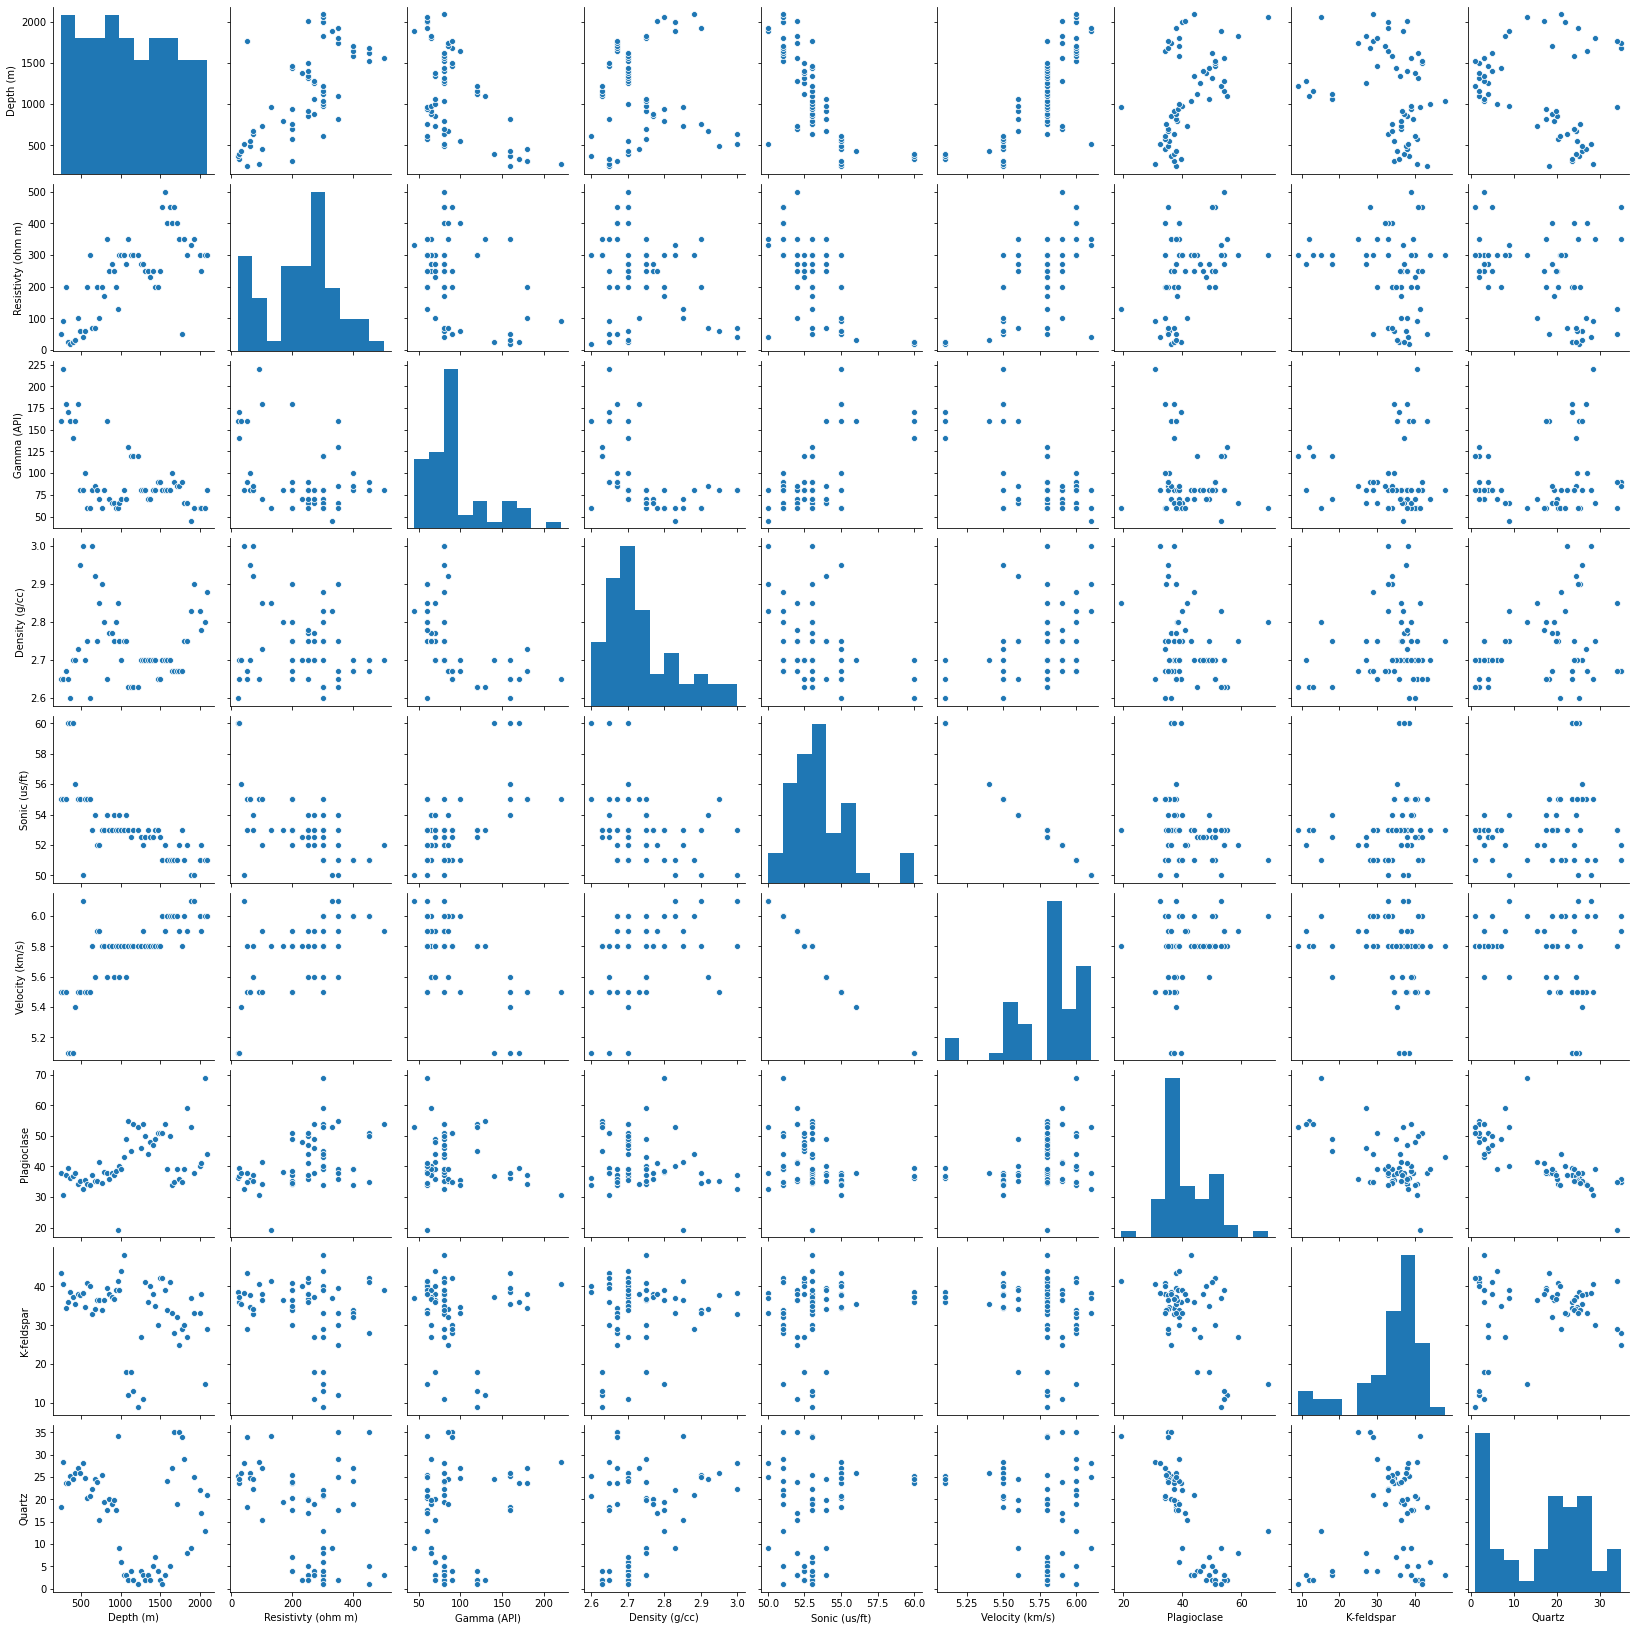

In [11]:
# An example of the various duo_relationns in the data
sns.pairplot(data, kind='scatter')

<Figure size 432x288 with 0 Axes>

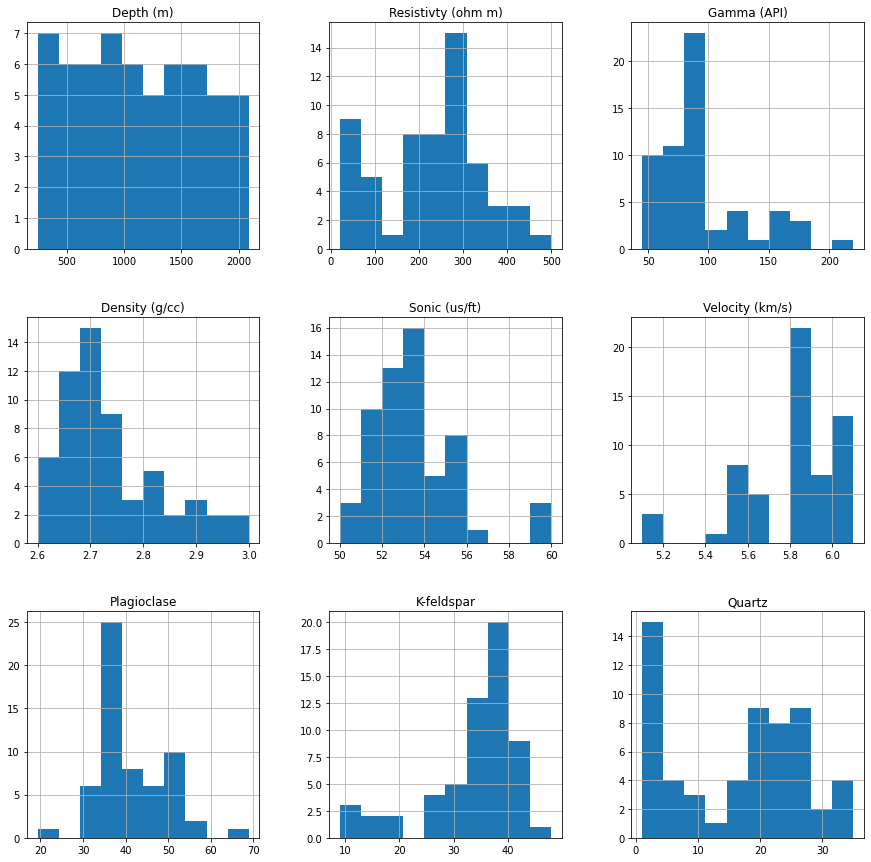

In [22]:
fig=plt.figure()
data.hist(figsize=(15,15), bins=10)
plt.show()

<AxesSubplot:>

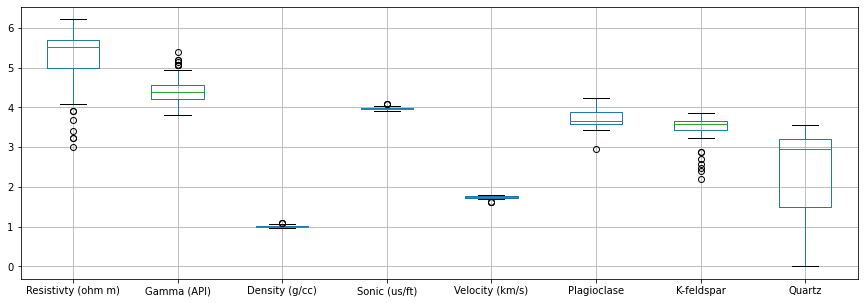

In [32]:
data_logarithmic.drop(["Depth (m)"], axis=1).boxplot(figsize=(15,5))

## d- 3D visuals of the desired outputs and higher coorelation value 

### a- ['Plagioclase', 'Resistivty (ohm m)', 'Velocity (km/s)'] static and interactive plot

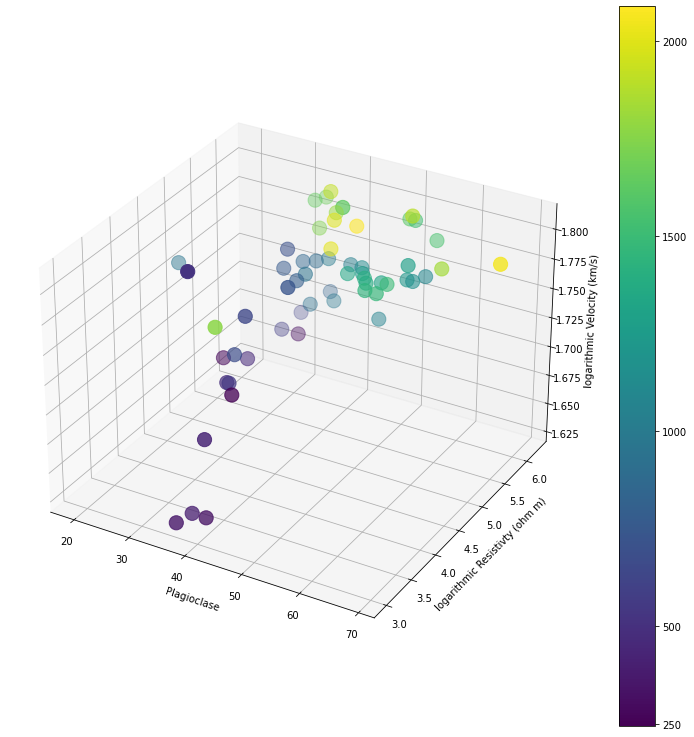

In [38]:
# 3D visuals of the desired outputs and higher coorelation value 
#['Plagioclase', 'Resistivty (ohm m)', 'Velocity (km/s)']
#['K-feldspar', 'Resistivty (ohm m)', 'Sonic (us/ft)']
#['Quartz', 'Resistivty (ohm m)', 'Density (g/cc)']


from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

fig = pyplot.figure(figsize=(10,10))
ax = Axes3D(fig)
x= data['Plagioclase']
y= np.log(data['Resistivty (ohm m)'])
z= np.log(data['Velocity (km/s)'])

cax=ax.scatter(x, y, z, c=data['Depth (m)'], marker='o', s=200)

ax.set_xlabel('Plagioclase')
ax.set_ylabel('logarithmic Resistivty (ohm m)')
ax.set_zlabel('logarithmic Velocity (km/s)')

cbar1 = fig.colorbar(cax,ticks=[250, 500, 1000, 1500, 2000])

pyplot.show()

In [36]:
import plotly.express as px

#['Plagioclase', 'Resistivty (ohm m)', 'Velocity (km/s)']
fig = px.scatter_3d(data, x=data['Plagioclase'], y=np.log(data['Resistivty (ohm m)']), z=np.log(data['Velocity (km/s)']),
                    color=data['Depth (m)'])
fig.show()

### b- ['K-feldspar', 'Resistivty (ohm m)', 'Sonic (us/ft)'] static and interactive plot

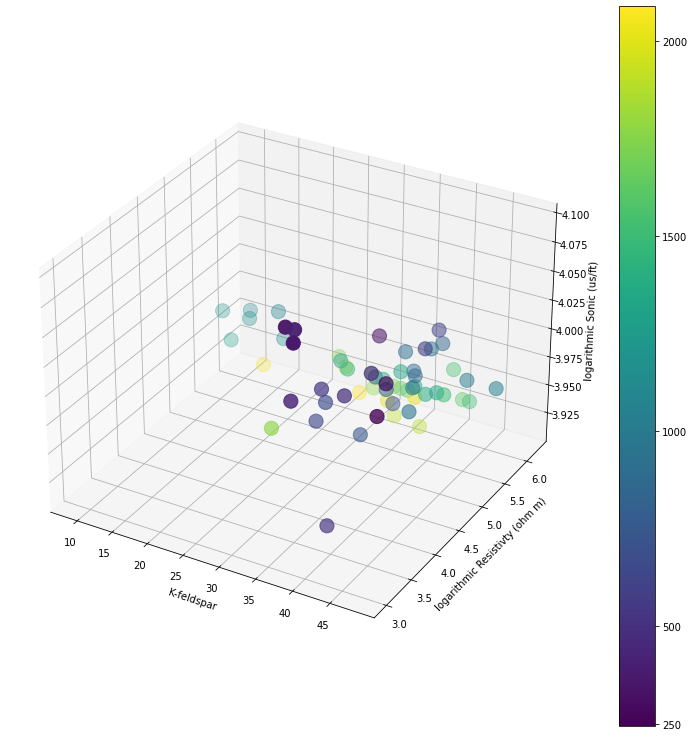

In [40]:
# 3D visuals of the desired outputs and higher coorelation value 
#['Plagioclase', 'Resistivty (ohm m)', 'Velocity (km/s)']
#['K-feldspar', 'Resistivty (ohm m)', 'Sonic (us/ft)']
#['Quartz', 'Resistivty (ohm m)', 'Density (g/cc)']


from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

fig = pyplot.figure(figsize=(10,10))
ax = Axes3D(fig)
x= data['K-feldspar']
y= np.log(data['Resistivty (ohm m)'])
z= np.log(data['Sonic (us/ft)'])

cax=ax.scatter(x, y, z, c=data['Depth (m)'], marker='o', s=200)

ax.set_xlabel('K-feldspar')
ax.set_ylabel('logarithmic Resistivty (ohm m)')
ax.set_zlabel('logarithmic Sonic (us/ft)')

cbar1 = fig.colorbar(cax,ticks=[250, 500, 1000, 1500, 2000])

pyplot.show()

In [42]:
import plotly.express as px

#['K-feldspar', 'Resistivty (ohm m)', 'Sonic (us/ft)']
fig = px.scatter_3d(data, x=data['K-feldspar'], y=np.log(data['Resistivty (ohm m)']), z=np.log(data['Sonic (us/ft)']),
                    color=data['Depth (m)'])
fig.show()

### c- ['Quartz', 'Resistivty (ohm m)', 'Density (g/cc)'] static and interactive plot

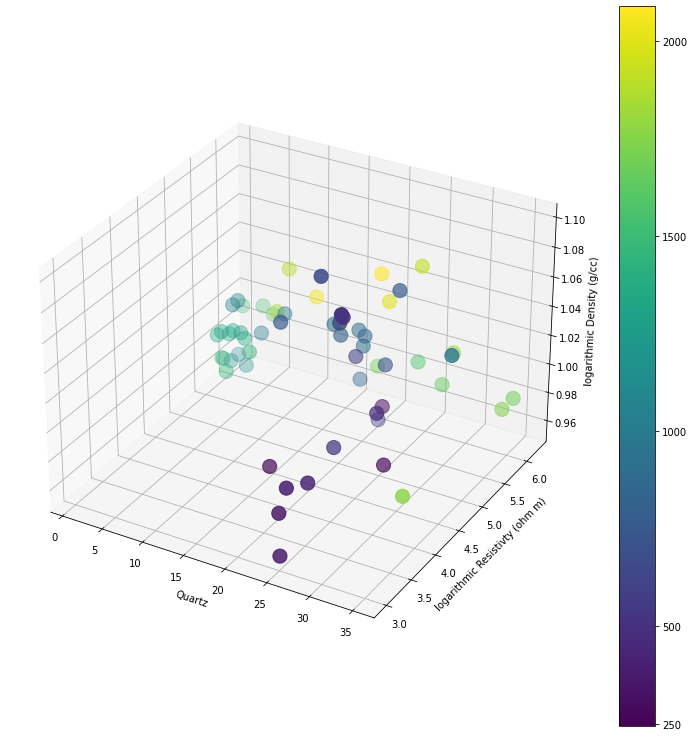

In [43]:
# 3D visuals of the desired outputs and higher coorelation value 
#['Plagioclase', 'Resistivty (ohm m)', 'Velocity (km/s)']
#['K-feldspar', 'Resistivty (ohm m)', 'Sonic (us/ft)']
#['Quartz', 'Resistivty (ohm m)', 'Density (g/cc)']


from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

fig = pyplot.figure(figsize=(10,10))
ax = Axes3D(fig)
x= data['Quartz']
y= np.log(data['Resistivty (ohm m)'])
z= np.log(data['Density (g/cc)'])

cax=ax.scatter(x, y, z, c=data['Depth (m)'], marker='o', s=200)

ax.set_xlabel('Quartz')
ax.set_ylabel('logarithmic Resistivty (ohm m)')
ax.set_zlabel('logarithmic Density (g/cc)')

cbar1 = fig.colorbar(cax,ticks=[250, 500, 1000, 1500, 2000])

pyplot.show()

In [44]:
import plotly.express as px

#['Quartz', 'Resistivty (ohm m)', 'Density (g/cc)']
fig = px.scatter_3d(data, x=data['Quartz'], y=np.log(data['Resistivty (ohm m)']), z=np.log(data['Density (g/cc)']),
                    color=data['Depth (m)'])
fig.show()

# 4- Data treatement 

In [8]:
data_stnd=data.copy()

## a- Data standarlization

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_stnd=scaler.fit_transform(data_stnd)

features=['Depth (m)', 'Resistivty (ohm m)', 'Gamma (API)', 'Density (g/cc)',
       'Sonic (us/ft)', 'Velocity (km/s)', 'Plagioclase', 'K-feldspar',
       'Quartz']

data_stnd = pd.DataFrame(data_stnd, columns=features)
data_stnd

,Depth (m),Resistivty (ohm m),Gamma (API),Density (g/cc),Sonic (us/ft),Velocity (km/s),Plagioclase,K-feldspar,Quartz
0,-1.674440,-1.515006,1.804048,-0.923437,0.890869,-1.120719,-0.476095,1.128479,0.177290
1,-1.616800,-1.190853,3.402630,-0.923437,0.890869,-1.120719,-1.315664,0.814366,1.148996
2,-1.559160,-0.299430,2.336909,-0.711854,0.890869,-1.120719,-0.560052,0.093070,0.691723
3,-1.501520,-1.717602,2.070479,-0.923437,3.237355,-2.838184,-0.272199,0.267577,0.691723
4,-1.443880,-1.758122,1.804048,-1.452397,3.237355,-2.838184,-0.656003,0.570056,0.834621
5,-1.386429,-1.717602,1.271188,-0.394478,3.237355,-2.838184,-0.572046,0.407183,0.777461
6,-1.328789,-1.677083,1.804048,-0.394478,1.360166,-1.550085,-0.488089,0.197775,0.910833
7,-1.271149,-1.109814,2.336909,-0.077103,0.890869,-1.120719,-0.907873,0.500253,1.006098
8,-1.213510,-1.433968,-0.327393,2.250318,0.890869,-1.120719,-0.787935,0.476986,0.901306
9,-1.155870,-1.596045,-0.327393,2.779278,-1.455617,1.455479,-1.111769,0.535155,1.110890


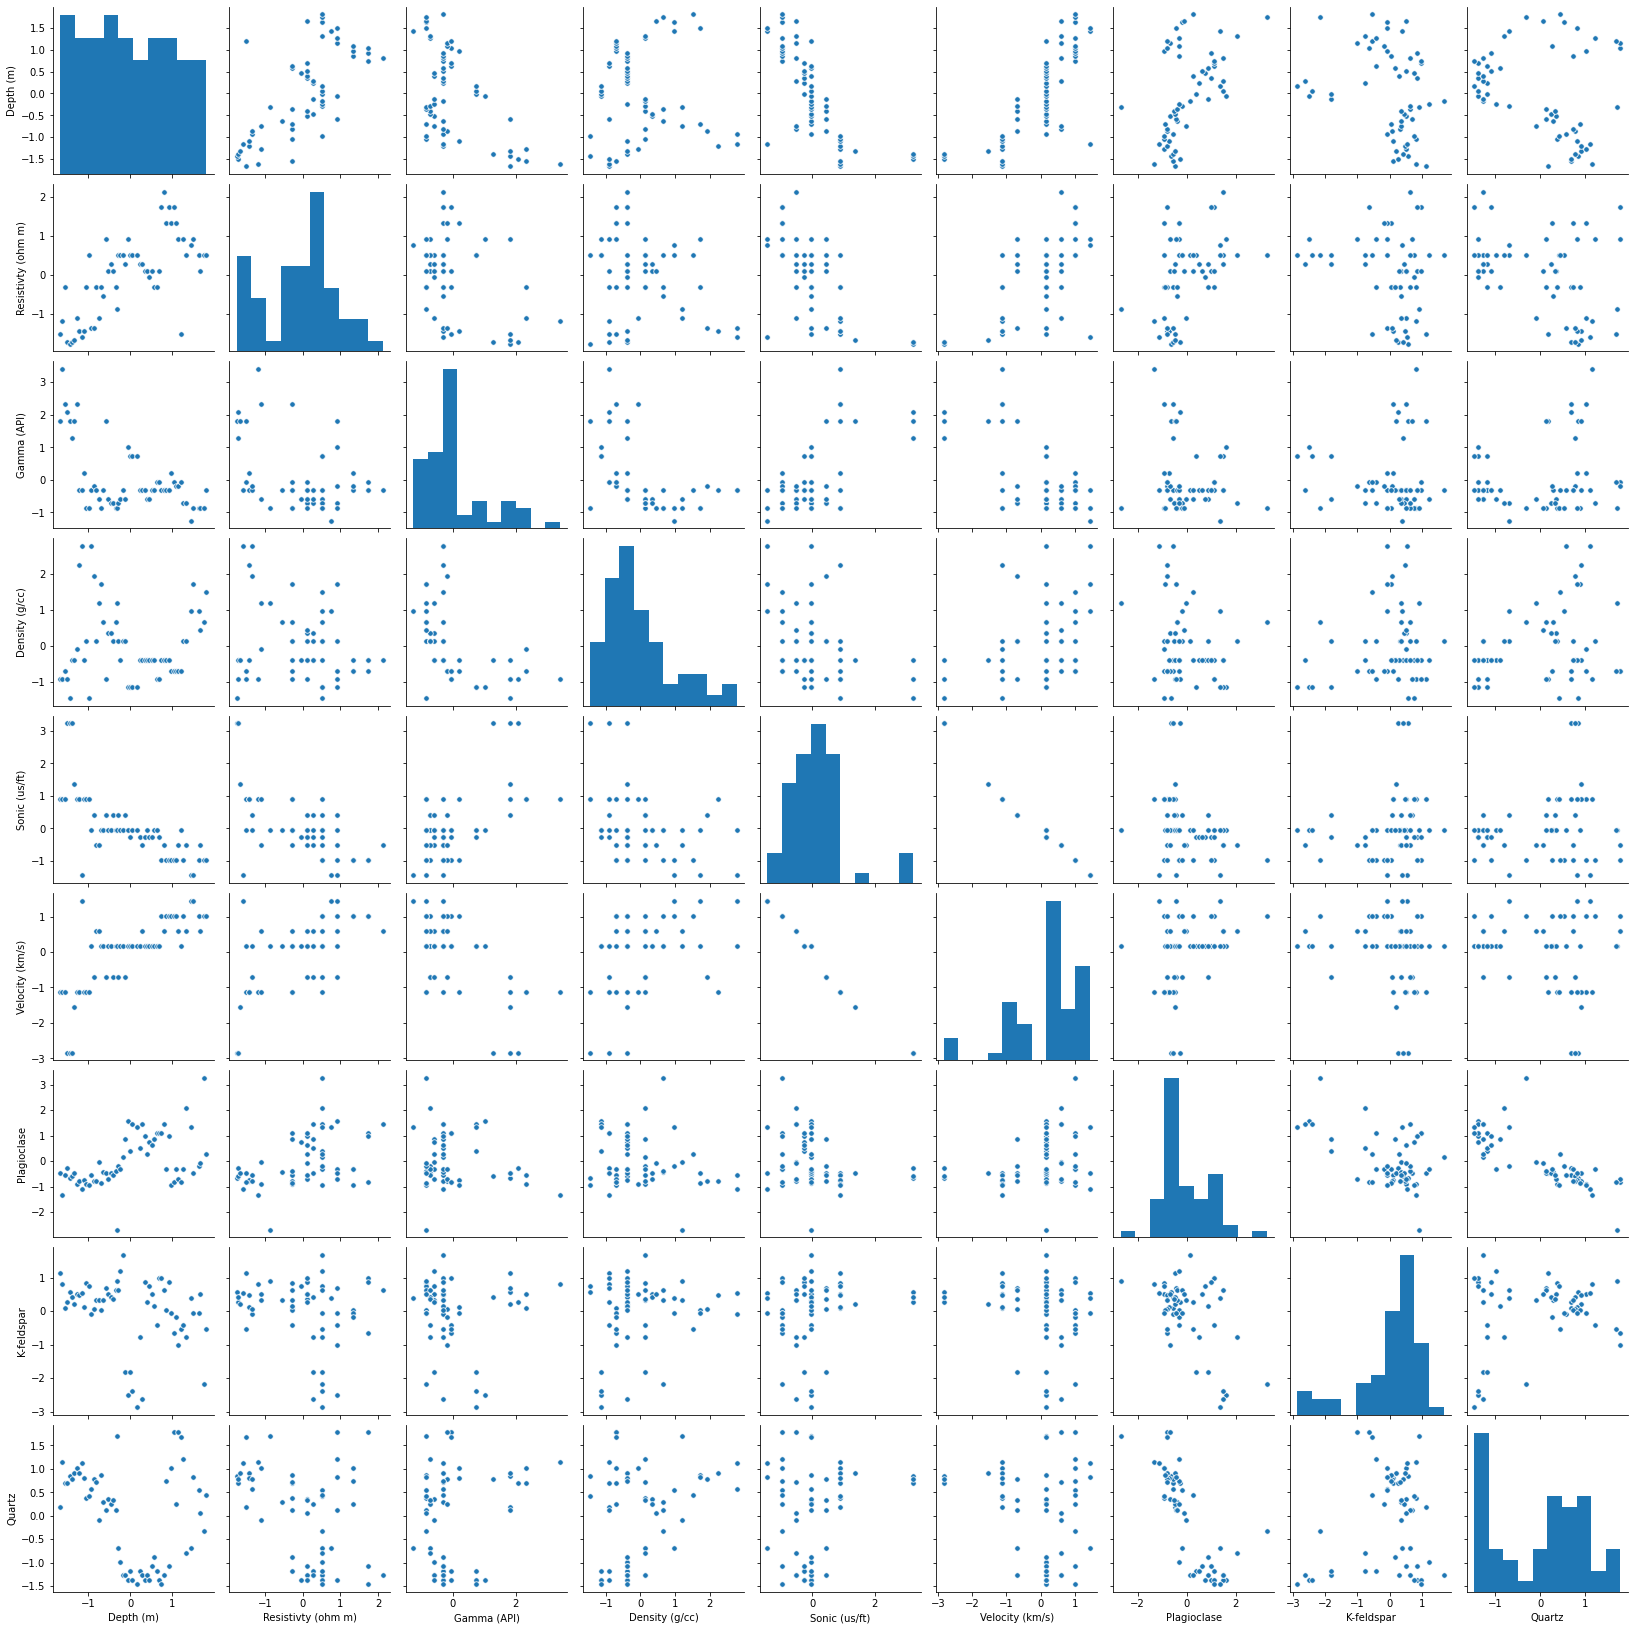

In [59]:
sns.pairplot(data_stnd, kind='scatter', plot_kws = {'s': 30})

## b- Outliers detection

In [11]:
data_stnd_drop=data_stnd.copy()

# Method 1: Standard Deviation Method (traditional)
train_std = data_stnd_drop[np.abs(data_stnd_drop - data_stnd_drop.mean()) <= (3 * data_stnd_drop.std())]

## delete all rows that have NaNs
train_std = data_stnd_drop.dropna()

# Method 2: Isolation Forest
iso = IsolationForest(contamination=0.5)
yhat = iso.fit_predict(data_stnd_drop)
mask = yhat != -1
train_iso = data_stnd_drop[mask]

# Method 3: Minimum Covariance Determinant
ee = EllipticEnvelope(contamination=0.1)
yhat = ee.fit_predict(data_stnd_drop)
mask = yhat != -1
train_ee = data_stnd_drop[mask]

# Method 4: Local Outlier Factor
lof = LocalOutlierFactor(contamination=0.3)
yhat = lof.fit_predict(data_stnd_drop)
mask = yhat != -1
train_lof = data_stnd_drop[mask]

# Method 5: One-class SVM
svm = OneClassSVM(nu=0.1)
yhat = svm.fit_predict(data_stnd_drop)
mask = yhat != -1
train_svm = data_stnd_drop[mask]

Number of points before outliers removed                       : 59
Number of points after outliers removed with Standard Deviation: 59
Number of points after outliers removed with Isolation Forest  : 30
Number of points after outliers removed with Min. Covariance   : 53
Number of points after outliers removed with Outlier Factor    : 41
Number of points after outliers removed with One-class SVM     : 48


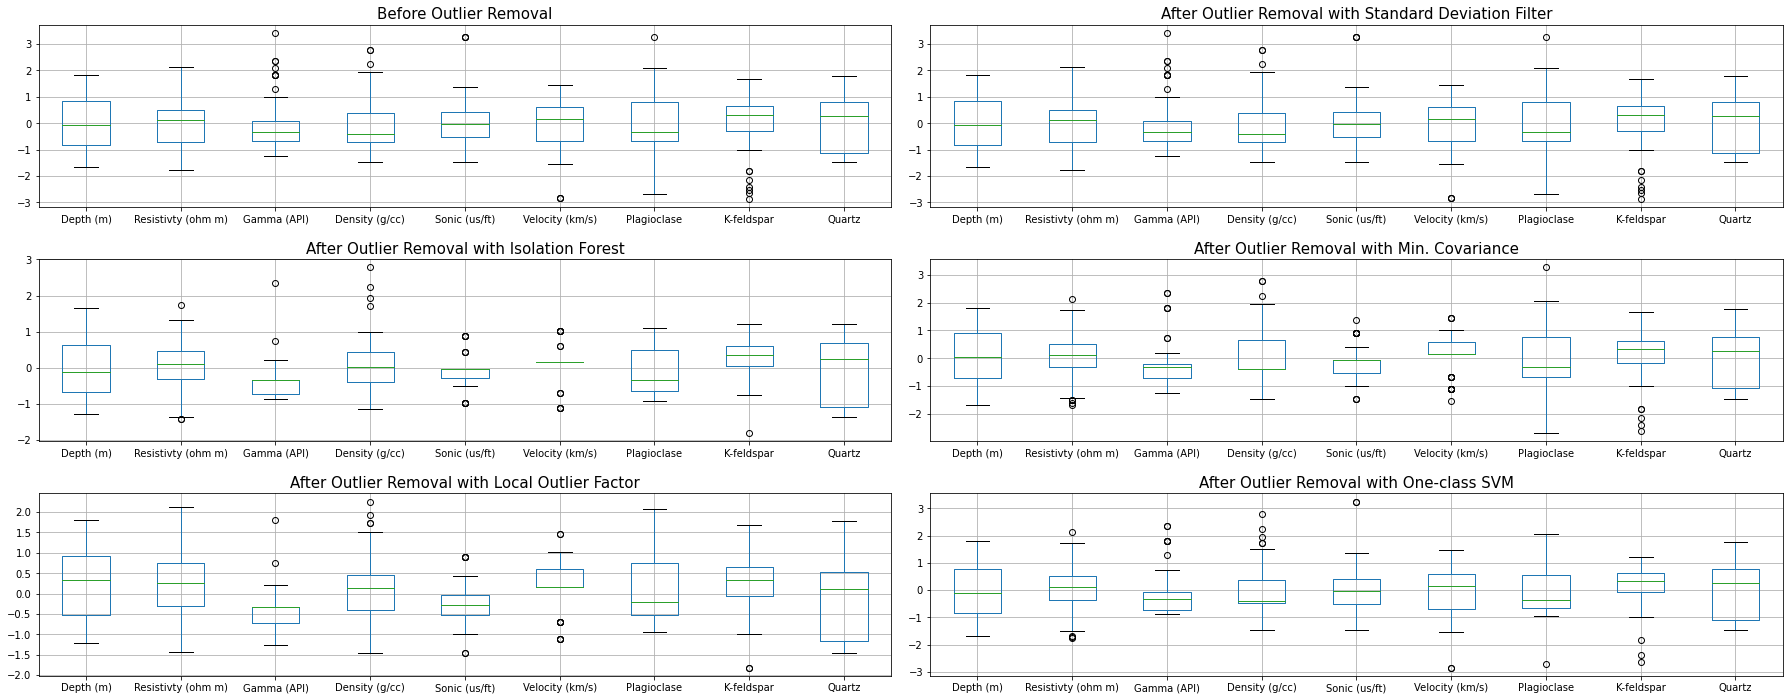

In [12]:
print('Number of points before outliers removed                       :', len(data_stnd_drop))
print('Number of points after outliers removed with Standard Deviation:', len(train_std))
print('Number of points after outliers removed with Isolation Forest  :', len(train_iso))
print('Number of points after outliers removed with Min. Covariance   :', len(train_ee))
print('Number of points after outliers removed with Outlier Factor    :', len(train_lof))
print('Number of points after outliers removed with One-class SVM     :', len(train_svm))

plt.figure(figsize=(25,10))

plt.subplot(3,2,1)
data_stnd_drop[features].boxplot()
plt.title('Before Outlier Removal', size=15)

plt.subplot(3,2,2)
train_std[features].boxplot()
plt.title('After Outlier Removal with Standard Deviation Filter', size=15)

plt.subplot(3,2,3)
train_iso[features].boxplot()
plt.title('After Outlier Removal with Isolation Forest', size=15)

plt.subplot(3,2,4)
train_ee[features].boxplot()
plt.title('After Outlier Removal with Min. Covariance', size=15)

plt.subplot(3,2,5)
train_lof[features].boxplot()
plt.title('After Outlier Removal with Local Outlier Factor', size=15)

plt.subplot(3,2,6)
train_svm[features].boxplot()
plt.title('After Outlier Removal with One-class SVM', size=15)

plt.tight_layout(1.7)
plt.show()

The data is already small so we won't reduce the data size

In [13]:
data_stnd.columns

Index(['Depth (m)', 'Resistivty (ohm m)', 'Gamma (API)', 'Density (g/cc)',
       'Sonic (us/ft)', 'Velocity (km/s)', 'Plagioclase', 'K-feldspar',
       'Quartz'],
      dtype='object')

In [43]:
from sklearn.model_selection import train_test_split
X_data = data_stnd[['Resistivty (ohm m)', 'Gamma (API)', 'Density (g/cc)', 'Sonic (us/ft)', 'Velocity (km/s)']]
y_data = data_stnd[['Plagioclase', 'K-feldspar', 'Quartz']]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    test_size=0.3, random_state=42)
#X_train= X_train.values
#X_test= X_test.values
#y_train= y_train.values
#y_test= y_test.values

In [46]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn import ensemble

estimator = MultiOutputRegressor(ensemble.GradientBoostingRegressor())
estimator.fit(X_train,y_train)

# Predict
#y_pred = estimator.predict(X_test)
#print("R-squared of test: {}".format(estimator.score(X_test, y_test)))
#rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#print("RMSE of Well 1: {}".format(rmse))

print('Train set mse:', mean_squared_error(y_train, estimator.predict(X_train)))
print('Test set mse:', mean_squared_error(y_test, estimator.predict(X_test)))

print('Train set score:', estimator.score(X_train,y_train))
print('Test set score:', estimator.score(X_test, estimator.predict(X_test)))

Train set mse: 0.023348691485372917
Test set mse: 1.7209945115487022
Train set score: 0.9739407969633546
Test set score: 1.0


In [16]:
p_v=estimator.predict(X_test)

predicted_values=pd.DataFrame(p_v, columns=['Plagioclase', 'K-feldspar', 'Quartz'])
real_values=pd.DataFrame(y_test, columns=['Plagioclase', 'K-feldspar', 'Quartz'])

Target_scaler=StandardScaler()
Target_scaler.fit(data[['Plagioclase', 'K-feldspar', 'Quartz']])

# Inverse standarscalar
R_V= Target_scaler.inverse_transform(real_values)
P_V= Target_scaler.inverse_transform(predicted_values)


R_V=pd.DataFrame(R_V, columns=['Plagioclase', 'K-feldspar', 'Quartz'])
P_V=pd.DataFrame(P_V, columns=['Plagioclase', 'K-feldspar', 'Quartz'])


In [51]:
# Multiprediction
# X_train, X_test, y_train, y_test
ETR = ExtraTreesRegressor(n_estimators=100, random_state=0)
ETR.fit(X_train,y_train)

print('Train set mse:', mean_squared_error(y_train, ETR.predict(X_train)))
print('Test set mse:', mean_squared_error(y_test, ETR.predict(X_test)))
print('Test set score:', ETR.score(X_train,y_train))

Train set mse: 0.0013534846021115061
Test set mse: 1.0730207050431526
Test set score: 0.9985009485715236


In [108]:
%time
RFR = RandomForestRegressor(n_estimators = 100)
RFR.fit(X_train,y_train)

print('Train set mse:', mean_squared_error(y_train, RFR.predict(X_train)))
print('Test set mse:', mean_squared_error(y_test, RFR.predict(X_test)))
print('Test set score:', RFR.score(X_train,y_train))

Wall time: 0 ns
Train set mse: 0.0847184700727671
Test set mse: 1.3520548920939435
Test set score: 0.9067377091637985


In [103]:
RFR_results=RFR.predict(X_test)
P_V= Target_scaler.inverse_transform(RFR_results)
RFR_df=pd.DataFrame(P_V, columns=[['P_Plagioclase', 'P_K-feldspar', 'P_Quartz']])

y_test_rescaled=Target_scaler.inverse_transform(y_test)
y_test_rescaled=pd.DataFrame(y_test_rescaled, columns=[['T_Plagioclase', 'T_K-feldspar', 'T_Quartz']])


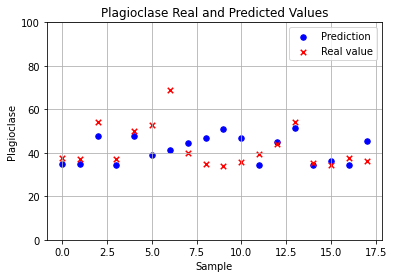

In [104]:
fig, ax = plt.subplots()

Prediction=ax.scatter(RFR_df.index, RFR_df[['P_Plagioclase']], s=30, c='blue', marker='o')
Real_value=ax.scatter(y_test_rescaled.index, y_test_rescaled[['T_Plagioclase']], s=30, c='red', marker='x')
plt.title('Plagioclase Real and Predicted Values')
plt.xlabel('Sample')
plt.ylabel('Plagioclase')
plt.ylim([0, 100])

plt.legend((Prediction, Real_value),
           ('Prediction', 'Real value'),
           scatterpoints=1,
           fontsize=10)


ax.grid(True)

plt.show()

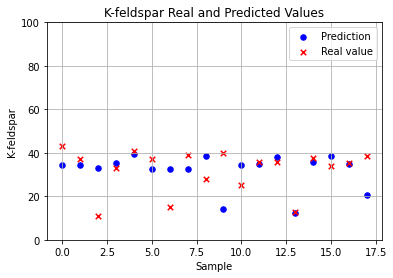

In [105]:
fig, ax = plt.subplots()

Prediction=ax.scatter(RFR_df.index, RFR_df[['P_K-feldspar']], s=30, c='blue', marker='o')
Real_value=ax.scatter(y_test_rescaled.index, y_test_rescaled[['T_K-feldspar']], s=30, c='red', marker='x')
plt.title('K-feldspar Real and Predicted Values')
plt.xlabel('Sample')
plt.ylabel('K-feldspar')
plt.ylim([0, 100])

plt.legend((Prediction, Real_value),
           ('Prediction', 'Real value'),
           scatterpoints=1,
           fontsize=10)


ax.grid(True)

plt.show()

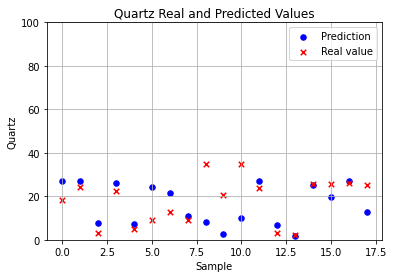

In [106]:
'T_Plagioclase', 'T_K-feldspar', ''
fig, ax = plt.subplots()

Prediction=ax.scatter(RFR_df.index, RFR_df[['P_Quartz']], s=30, c='blue', marker='o')
Real_value=ax.scatter(y_test_rescaled.index, y_test_rescaled[['T_Quartz']], s=30, c='red', marker='x')
plt.title('Quartz Real and Predicted Values')
plt.xlabel('Sample')
plt.ylabel('Quartz')
plt.ylim([0, 100])

plt.legend((Prediction, Real_value),
           ('Prediction', 'Real value'),
           scatterpoints=1,
           fontsize=10)


ax.grid(True)

plt.show()

## Machine learning for a parameter

In [20]:
BYNR = linear_model.BayesianRidge()
BYNR.fit(X_train,Y_train)

print('Train set mse:', mean_squared_error(Y_train, BYNR.predict(X_train)))
print('Test set mse:', mean_squared_error(Y_test, BYNR.predict(X_test)))
print('Test set score:', BYNR.score(X_train,Y_train))

Train set mse: 0.5593770456216073
Test set mse: 1.692378778343879
Test set score: 0.34721106704890825


In [21]:
LR = LinearRegression()
LR.fit(X_train,Y_train)

print('Train set mse:', mean_squared_error(Y_train, LR.predict(X_train)))
print('Test set mse:', mean_squared_error(Y_test, LR.predict(X_test)))
print('Test set score:', LR.score(X_train,Y_train))

Train set mse: 0.5502718433109176
Test set mse: 1.8550703722065112
Test set score: 0.35783677174527084


In [ ]:
ADB= AdaBoostRegressor(random_state=0, n_estimators=100)
ADB.fit(X_train,y_train)

print('Train set mse:', mean_squared_error(y_train, ADB.predict(X_train)))
print('Test set mse:', mean_squared_error(y_test, ADB.predict(X_test)))
print('Test set score:', ADB.score(X_train,y_train))

In [25]:
from xgboost import XGBRegressor
XGB = XGBRegressor(max_depth=16,n_estimators=200,seed=1)
XGB.fit(X_train,Y_train)

print('Train set mse:', mean_squared_error(Y_train, XGB.predict(X_train)))
print('Test set mse:', mean_squared_error(Y_test, XGB.predict(X_test)))
print('Test set score:', XGB.score(X_train,Y_train))

Train set mse: 0.0015314851861536183
Test set mse: 2.27048939379366
Test set score: 0.9982127679562026


In [ ]:
plt.plot(x,y,'red',linewidth¼4, linestyle¼'--')
plt.xlabel('Time')
plt.ylabel('Number of iterations')
plt.title('Number of Iterations Vs. Time')

In [26]:
LGBM = LGBMRegressor(max_depth=16,n_estimators=200,seed=1)
LGBM.fit(X_train,Y_train)

print('Train set mse:', mean_squared_error(Y_train, LGBM.predict(X_train)))
print('Test set mse:', mean_squared_error(Y_test, LGBM.predict(X_test)))
print('Test set score:', LGBM.score(X_train,Y_train))

Train set mse: 0.5668488356855577
Test set mse: 1.5497652298113438
Test set score: 0.3384915425327376


In [ ]:
# SearchGrid optimization

rfc=RandomForestRegressor(random_state=42)
param_grid = { 
    'n_estimators': [200, 500, 800],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6],
    'criterion' :['mse', 'mae']}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)
CV_rfc.best_params_


rfc1=RandomForestRegressor(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')
rfc1.fit(x_train, y_train)
pred=rfc1.predict(x_test)
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))